In [1]:
from gnn_scheduler.jssp import load_all_from_benchmark, load_metadata
import pandas as pd

instances = load_all_from_benchmark(if_has_optimum=True)
len(instances)

130

In [4]:
def get_max_jobtime(instance):
    max_job_time = 0
    for job in instance.jobs:
        job_time = sum(operation.duration for operation in job)
        max_job_time = max(max_job_time, job_time)
    return max_job_time

In [7]:
# create a dataframe with columns: instance_name, n_jobs, n_machines, total_time, optimum
names = []
n_jobs = []
n_machines = []
total_time = []
optimum = []
max_job_time = []
for instance in instances:
    names.append(instance.name)
    n_jobs.append(instance.n_jobs)
    n_machines.append(instance.n_machines)
    total_time.append(instance.total_duration)
    optimum.append(instance.optimum)
    max_job_time.append(get_max_jobtime(instance))
df = pd.DataFrame({
    'instance_name': names,
    'n_jobs': n_jobs,
    'n_machines': n_machines,
    'total_time': total_time,
    'optimum': optimum,
    'max_job_time': max_job_time
})

df.head()

,instance_name,n_jobs,n_machines,total_time,optimum,max_job_time
0,abz5,10,10,7773,1234,859
1,abz6,10,10,5946,943,742
2,abz7,20,15,7366,656,410
3,abz9,20,15,7442,678,467
4,ft06,6,6,197,55,47


In [10]:
df["total_time_div_n_machines"] = df["total_time"] / df["n_machines"]
df.head(10)

,instance_name,n_jobs,n_machines,total_time,optimum,max_job_time,total_time_div_n_machines
0,abz5,10,10,7773,1234,859,777.300000
1,abz6,10,10,5946,943,742,594.600000
2,abz7,20,15,7366,656,410,491.066667
3,abz9,20,15,7442,678,467,496.133333
4,ft06,6,6,197,55,47,32.833333
5,ft10,10,10,5109,930,655,510.900000
6,ft20,20,5,5109,1165,387,1021.800000
7,la01,10,5,2849,666,413,569.800000
8,la02,10,5,2643,655,394,528.600000
9,la03,10,5,2383,597,349,476.600000


In [12]:
sum(df["optimum"] < df["total_time_div_n_machines"])

0

In [13]:
sum(df["optimum"] < df["max_job_time"])

0

In [14]:
sum(df["max_job_time"] < df["total_time_div_n_machines"])

91

<Axes: ylabel='Frequency'>

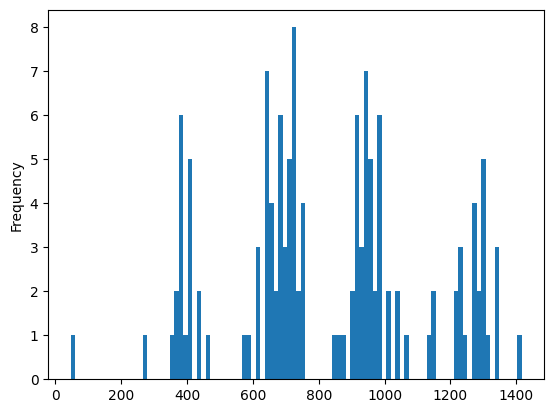

In [19]:
df.max_job_time.plot(kind="hist", bins=100)

<Axes: ylabel='Frequency'>

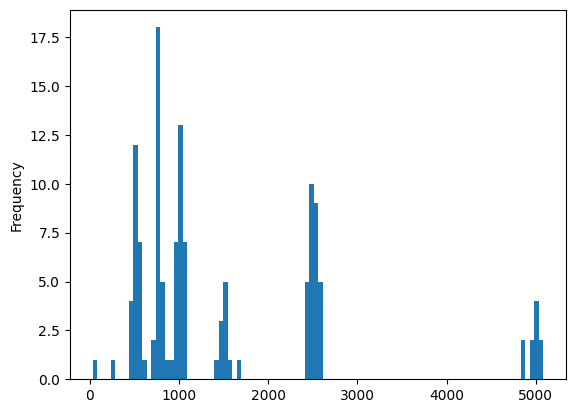

In [17]:
df.total_time_div_n_machines.plot(kind="hist", bins=100)

<Axes: ylabel='Frequency'>

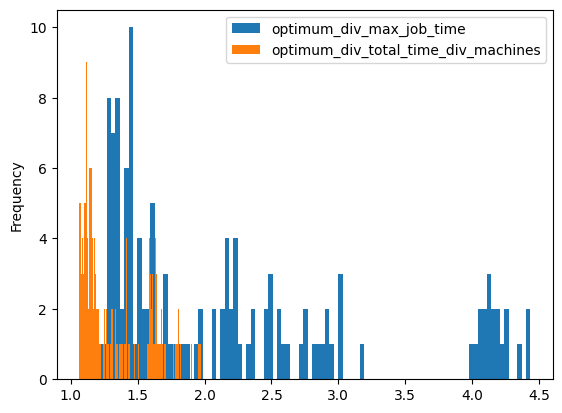

In [21]:
df["optimum_div_max_job_time"] = df["optimum"] / df["max_job_time"]
df["optimum_div_total_time_div_machines"] = df["optimum"] / df["total_time_div_n_machines"]
df.optimum_div_max_job_time.plot(kind="hist", bins=100, legend=True)
df.optimum_div_total_time_div_machines.plot(kind="hist", bins=100, legend=True)

<Axes: ylabel='Frequency'>

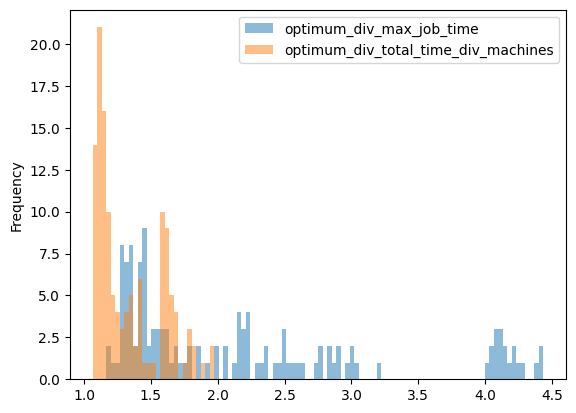

In [22]:
df[['optimum_div_max_job_time', 'optimum_div_total_time_div_machines']].plot(kind="hist", bins=100, alpha=0.5)

In [23]:
df[['optimum_div_max_job_time', 'optimum_div_total_time_div_machines']].describe()

,optimum_div_max_job_time,optimum_div_total_time_div_machines
count,130.000000,130.000000
mean,2.185670,1.333646
std,0.975507,0.245146
min,1.170213,1.064243
25%,1.421966,1.126151
50%,1.791055,1.214644
75%,2.614704,1.587403
max,4.435459,1.971491
